# Salary Prediction
### Author:Nour shosharah 

# import important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


from scipy.stats import norm
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost


from sklearn.model_selection import cross_val_score
import joblib
import pickle

# load Data

In [2]:
data_salary=pd.read_csv("jobs_train.csv")
data_salary.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362685006848,COMP14,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,JOB1362685403468,COMP36,JANITOR,NONE,NONE,FINANCE,3,4,73
2,JOB1362684563560,COMP56,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23,103
3,JOB1362684814664,COMP28,JANITOR,NONE,NONE,EDUCATION,22,42,63
4,JOB1362685123815,COMP48,CEO,DOCTORAL,NONE,OIL,15,66,129


# take alook about dataset

In [3]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                900000 non-null  object
 1   companyId            900000 non-null  object
 2   jobType              900000 non-null  object
 3   degree               900000 non-null  object
 4   major                900000 non-null  object
 5   industry             900000 non-null  object
 6   yearsExperience      900000 non-null  int64 
 7   milesFromMetropolis  900000 non-null  int64 
 8   salary               900000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 61.8+ MB


## Check for missing values

In [4]:
#store the sum of missing values in each column - 
print(data_salary.isnull().sum())


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64


there are no missing values

## check for duplicates

In [5]:
print(data_salary.duplicated().sum())

0


no duplicated values 



# Exploratory Data Analysis

In [6]:
data_salary.shape

(900000, 9)

## Descriptive statistics of quantitative data:

In [7]:
data_salary.describe()

,yearsExperience,milesFromMetropolis,salary
count,900000.000000,900000.000000,900000.000000
mean,11.991183,49.525906,116.067520
std,7.211222,28.883348,38.717799
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


The minimum, maximum and the range of these numbers all seem appropriate for their corresponding columns. The mean and Q2 of not indicate anything wrong.

In [8]:
data_salary[data_salary.salary<=0].shape

(5, 9)

There are 5 salaries that are $0 , and we will igoner them 

In [9]:

data_salary = data_salary[data_salary['salary']>0]
data_salary=data_salary.reset_index()
data_salary

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,JOB1362685006848,COMP14,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,1,JOB1362685403468,COMP36,JANITOR,NONE,NONE,FINANCE,3,4,73
2,2,JOB1362684563560,COMP56,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23,103
3,3,JOB1362684814664,COMP28,JANITOR,NONE,NONE,EDUCATION,22,42,63
4,4,JOB1362685123815,COMP48,CEO,DOCTORAL,NONE,OIL,15,66,129
...,...,...,...,...,...,...,...,...,...,...
899990,899995,JOB1362685208051,COMP41,CEO,BACHELORS,COMPSCI,AUTO,21,40,127
899991,899996,JOB1362684496156,COMP54,CTO,BACHELORS,NONE,WEB,20,24,129
899992,899997,JOB1362685401145,COMP40,SENIOR,HIGH_SCHOOL,NONE,AUTO,21,48,127
899993,899998,JOB1362684627870,COMP2,JANITOR,HIGH_SCHOOL,NONE,HEALTH,5,78,46


In [10]:
data_salary.describe(include = 'object')


,jobId,companyId,jobType,degree,major,industry
count,899995,899995,899995,899995,899995,899995
unique,899995,63,8,5,9,7
top,JOB1362685006848,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,14548,113266,213204,478951,128846


this is `NONE` in major column so it's `NAN` Values

is there another `NONE` in data? let's see

In [11]:
data_object=data_salary.select_dtypes("object")
for col in data_object:
    print(col)
    print(data_salary[col].value_counts().index)


jobId
Index(['JOB1362685006848', 'JOB1362685266922', 'JOB1362684980968',
       'JOB1362684664547', 'JOB1362684484028', 'JOB1362685073688',
       'JOB1362685354308', 'JOB1362684724331', 'JOB1362685310292',
       'JOB1362685011732',
       ...
       'JOB1362684665013', 'JOB1362684619404', 'JOB1362684962519',
       'JOB1362685316887', 'JOB1362684763934', 'JOB1362684455333',
       'JOB1362684718474', 'JOB1362684637499', 'JOB1362684894751',
       'JOB1362684921313'],
      dtype='object', length=899995)
companyId
Index(['COMP39', 'COMP35', 'COMP59', 'COMP9', 'COMP30', 'COMP20', 'COMP44',
       'COMP18', 'COMP43', 'COMP19', 'COMP42', 'COMP51', 'COMP3', 'COMP40',
       'COMP21', 'COMP46', 'COMP14', 'COMP62', 'COMP48', 'COMP56', 'COMP58',
       'COMP36', 'COMP23', 'COMP37', 'COMP10', 'COMP13', 'COMP54', 'COMP45',
       'COMP5', 'COMP16', 'COMP4', 'COMP24', 'COMP25', 'COMP32', 'COMP22',
       'COMP15', 'COMP6', 'COMP41', 'COMP47', 'COMP61', 'COMP55', 'COMP11',
       'COMP38', 'COMP

that is `NONE` in degree column too , I will deal with them 

In [12]:
# unique values in data_salary
data_salary.nunique()

index                  899995
jobId                  899995
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    279
dtype: int64

## Distribution 

Are salaries normally distrubuted?

/tmp/ipykernel_1611/4169638858.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_salary['salary'], fit=norm, label='Salaries', color="blue")


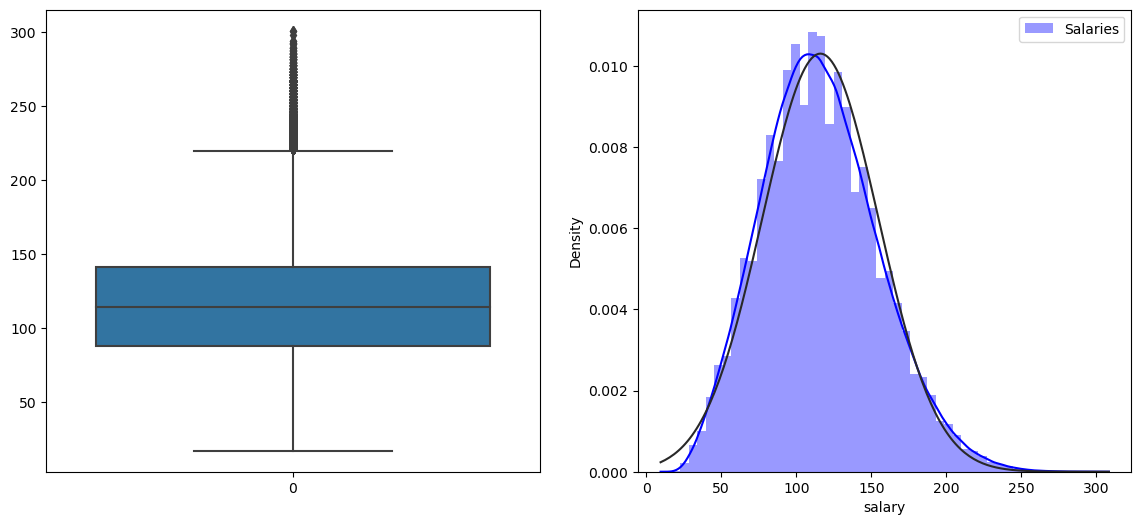

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data_salary['salary'])
plt.subplot(1,2,2)
sns.distplot(data_salary['salary'], fit=norm, label='Salaries', color="blue")

plt.legend();
# Plot distribution curve (blue) next to normal distribution (black).

seem to be normal distribution 

## outlier part

look like some outlier in upper range . 
let's cheack them 

In [14]:
#maybe outlier more than 210 
data_highest_salary=data_salary[data_salary["salary"]>210]
data_highest_salary.reset_index()


,level_0,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,11,11,JOB1362684982807,COMP38,CEO,HIGH_SCHOOL,NONE,OIL,17,0,231
1,81,81,JOB1362685212809,COMP10,CEO,HIGH_SCHOOL,NONE,WEB,21,2,221
2,189,189,JOB1362685198767,COMP22,VICE_PRESIDENT,MASTERS,BUSINESS,FINANCE,20,1,254
3,364,364,JOB1362684692926,COMP53,CEO,MASTERS,BIOLOGY,FINANCE,19,21,218
4,448,448,JOB1362685238800,COMP4,CTO,MASTERS,NONE,AUTO,23,16,219
...,...,...,...,...,...,...,...,...,...,...,...
11535,899628,899633,JOB1362684975796,COMP9,CFO,MASTERS,ENGINEERING,OIL,10,14,223
11536,899653,899658,JOB1362684881907,COMP36,CEO,MASTERS,COMPSCI,SERVICE,15,5,229
11537,899704,899709,JOB1362684626731,COMP38,CFO,DOCTORAL,BUSINESS,SERVICE,19,6,232
11538,899793,899798,JOB1362685119617,COMP1,CEO,MASTERS,BUSINESS,OIL,12,17,241


<Axes: ylabel='salary'>

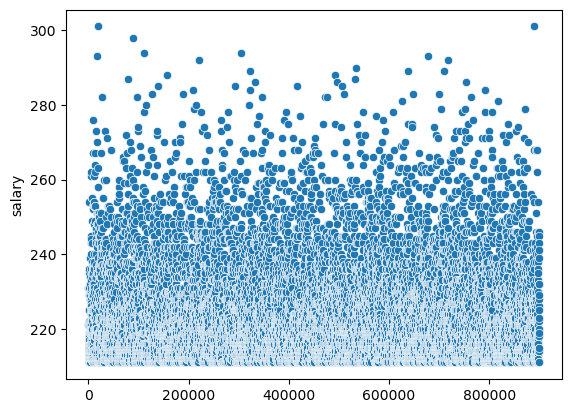

In [15]:
sns.scatterplot(data_highest_salary["salary"])

the data not scatterted randomely so I will not remove any thing randomely so let's study IQR

In [16]:
#We use IQR to identify potential outliers 

stats = data_salary['salary'].describe()
IQR = stats['75%'] - stats['25%']
upper_bound = stats['75%'] + 1.5 * IQR
lower_bound = stats['25%'] - 1.5 * IQR
print('The upper and lower bounds of possible outliers are :' , (upper_bound ,lower_bound))

The upper and lower bounds of possible outliers are : (220.5, 8.5)


In [17]:
# Examine the outliers below the lower bound- 
data_salary[data_salary['salary'] < 8.5]

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


let us examine the outliers above

In [18]:
data_salary.loc[data_salary['salary'] > 220.5, 'jobType'].value_counts()

CEO               2880
CFO               1351
CTO               1336
VICE_PRESIDENT     559
MANAGER            202
SENIOR              58
JUNIOR              15
Name: jobType, dtype: int64

In [19]:
#study the outliers for a particular type(JUNIOR)  , all other job are seem appropriate to thier salaries
data_salary[(data_salary['salary'] > 220.5) & (data_salary['jobType'] == 'JUNIOR')]

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
127979,127980,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
151454,151455,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
184514,184515,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225
200212,200213,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
221259,221260,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
236115,236116,JOB1362685362055,COMP11,JUNIOR,DOCTORAL,BUSINESS,OIL,24,26,223
266691,266692,JOB1362685151013,COMP14,JUNIOR,DOCTORAL,BUSINESS,FINANCE,19,0,236
378045,378048,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
384678,384681,JOB1362685195361,COMP43,JUNIOR,DOCTORAL,BUSINESS,FINANCE,18,15,232
451164,451167,JOB1362685093462,COMP38,JUNIOR,BACHELORS,ENGINEERING,OIL,24,13,225


The high salary potential outliers seem to be either C-level executives or the Juniors  are in industries such as Oil, Finance etc , who are known to have higher salaries. Hence, we do not drop them as they seem appropriate

also The Employees has advanced degree and years of experience are well paid. So it seems the data are realistic


Next, we will find the correlation coefficient for the `quantitative data`.

In [20]:
data_salary.corr()

/tmp/ipykernel_1611/89228932.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_salary.corr()


,index,yearsExperience,milesFromMetropolis,salary
index,1.000000,-0.001015,-0.001484,-0.000248
yearsExperience,-0.001015,1.000000,0.000202,0.374917
milesFromMetropolis,-0.001484,0.000202,1.000000,-0.297383
salary,-0.000248,0.374917,-0.297383,1.000000


Salary and yearsExperience have a weak positive correlation.

Salary and milesFromMetropolis have a weak negative correlaiton.

let's see those correlation 

Text(0, 0.5, 'Salaries')

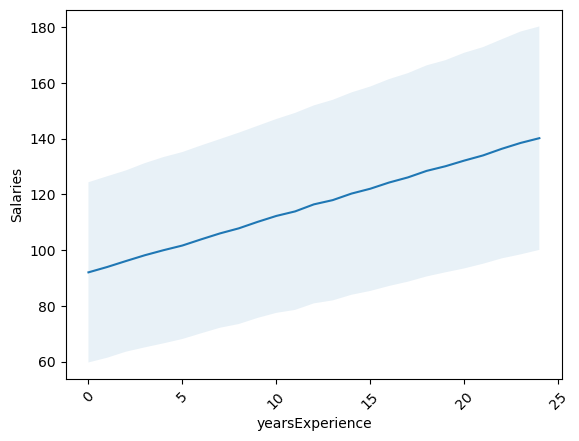

In [21]:
mean = data_salary.groupby("yearsExperience")['salary'].mean()
std = data_salary.groupby("yearsExperience")['salary'].std()
mean.plot()
plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
plt.xticks(rotation=45)
plt.ylabel('Salaries')

In general there is a clear correlation between salary and years of experience. As the years of experience increase, salary increases.

Text(0, 0.5, 'Salaries')

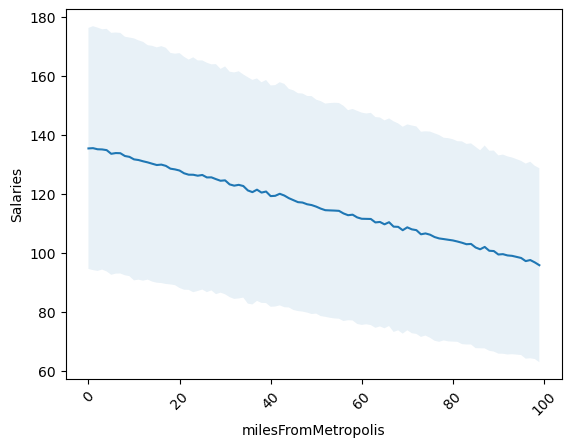

In [22]:
mean = data_salary.groupby("milesFromMetropolis")['salary'].mean()
std = data_salary.groupby("milesFromMetropolis")['salary'].std()
mean.plot()
plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
plt.xticks(rotation=45)
plt.ylabel('Salaries')

Salary decreases as the distance to metropolies increases

Now we will look at boxplot for each company ID to see if this will be useful for prediction purposes.

## Company ID visulization

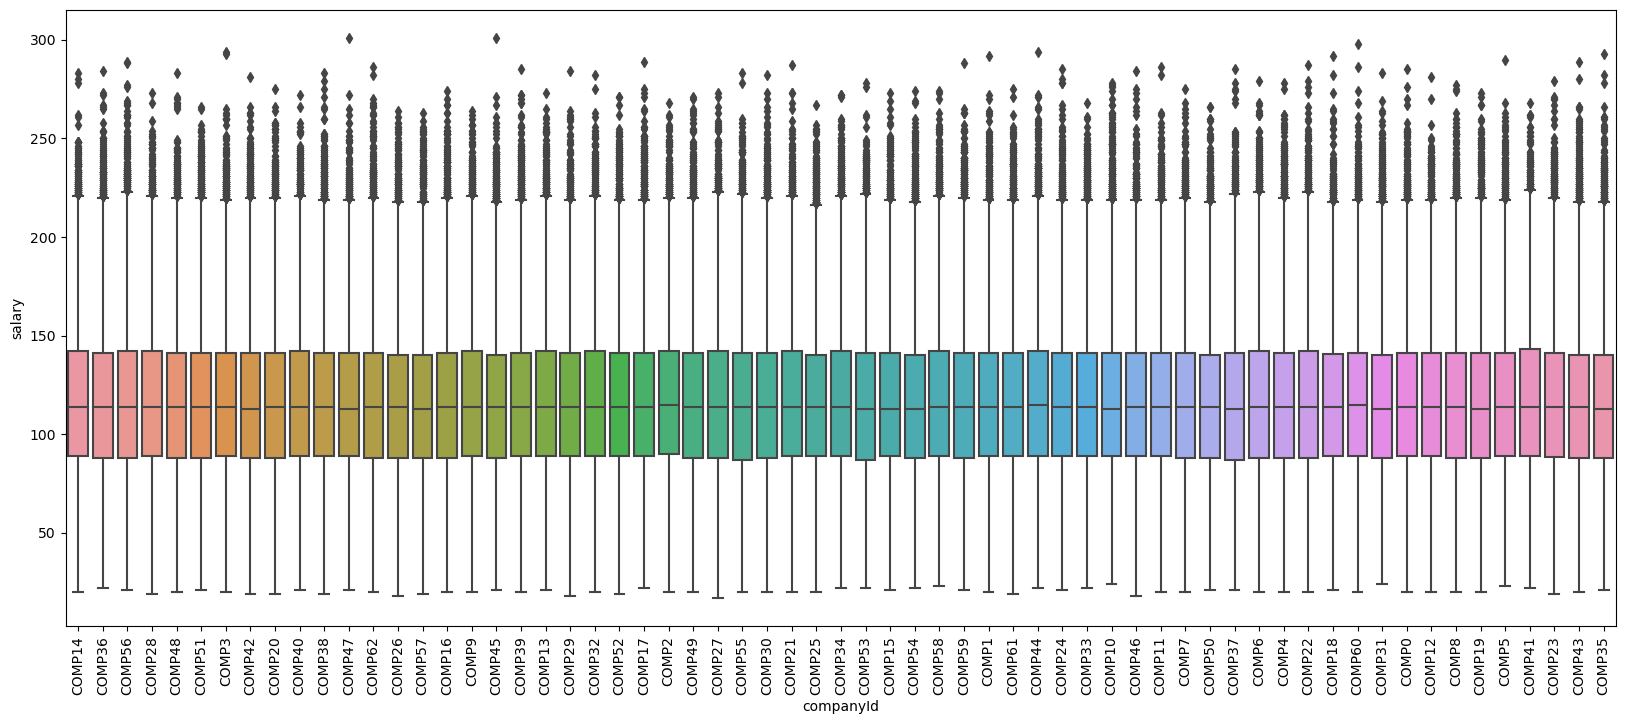

In [23]:
data=data_salary[["salary","companyId"]]
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x="companyId", y='salary', data=data)
plt.xticks(rotation=90);

Company ID shows salaries are evenly distributed from company to company and does not seem to be a good predictor for salary.

Job ID and company ID are irrelevant for prediction purposes, so they will be removed from the training data.

In [24]:
data_salary.head()

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,JOB1362685006848,COMP14,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,1,JOB1362685403468,COMP36,JANITOR,NONE,NONE,FINANCE,3,4,73
2,2,JOB1362684563560,COMP56,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23,103
3,3,JOB1362684814664,COMP28,JANITOR,NONE,NONE,EDUCATION,22,42,63
4,4,JOB1362685123815,COMP48,CEO,DOCTORAL,NONE,OIL,15,66,129


# Feature Engineering 

## Drop jobId and companyId

In [25]:

data_salary.drop('jobId', axis=1, inplace=True)
data_salary.drop('companyId', axis=1, inplace=True)
data_salary.drop('index', axis=1, inplace=True)

data_salary.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,JANITOR,NONE,NONE,FINANCE,3,4,73
2,MANAGER,HIGH_SCHOOL,NONE,SERVICE,11,23,103
3,JANITOR,NONE,NONE,EDUCATION,22,42,63
4,CEO,DOCTORAL,NONE,OIL,15,66,129


## replace None in Major and degree in Most frequent 

degree and major have null values present in the form of “NONE” I will replace them with most_frequent

In [26]:

imputer = SimpleImputer(missing_values="NONE", strategy="most_frequent")
imputer = imputer.fit(data_salary.loc[:, 'degree':'major'])
data_salary.loc[:, 'degree':'major'] = imputer.transform(data_salary.loc[:, 'degree':'major'])

## some visulization on categorical columns

Next, visualizations will be repeated for each categorical feature to see which features may affect salary. `Violin plots` will be used to view the shape of the distribution curve along with the mean and interquartile ranges  and the `object_col_with_chart` willl show the count plot of categorical columns with it's values and high and low of it's values

In [27]:
def ViolinPlot(data, var):
    data=data_salary[["salary",var]]    
    f, ax = plt.subplots(figsize=(12, 8))
    fig = sns.violinplot(x=var, y='salary', data=data, scale='count', inner='quartile')
    plt.xticks(rotation=75)

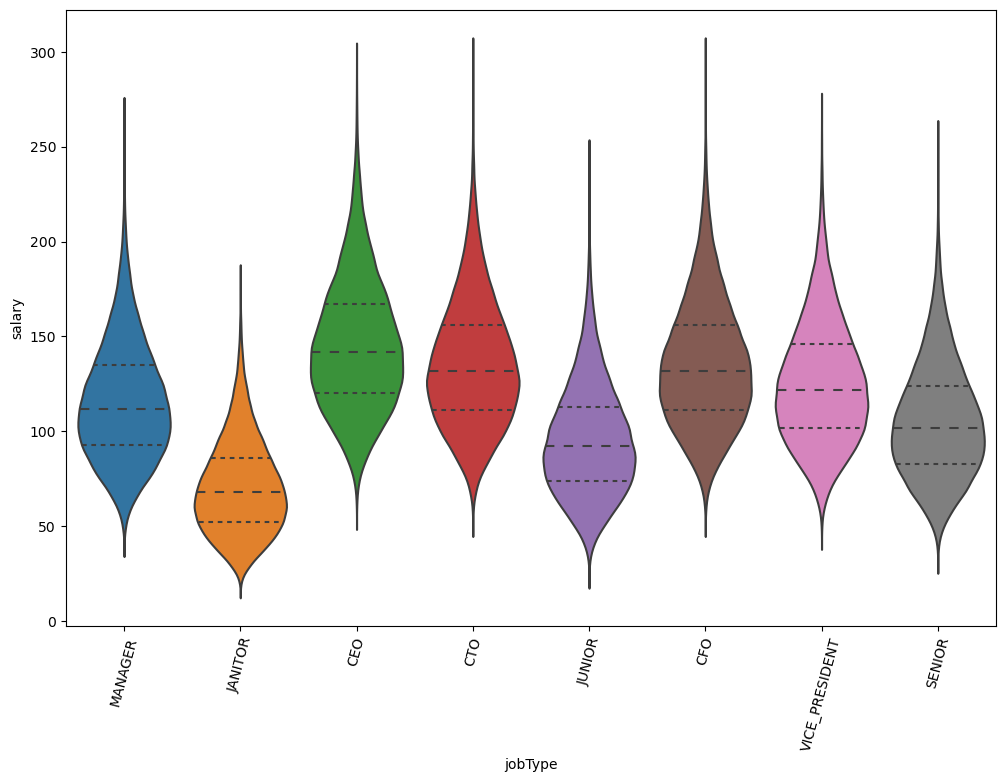

In [28]:
ViolinPlot(data_salary, 'jobType')

The highest salaries are for CEO, followed by CFO and CTO. The lowest is Janitor followed by Junior job types.
Distributions appear normal.


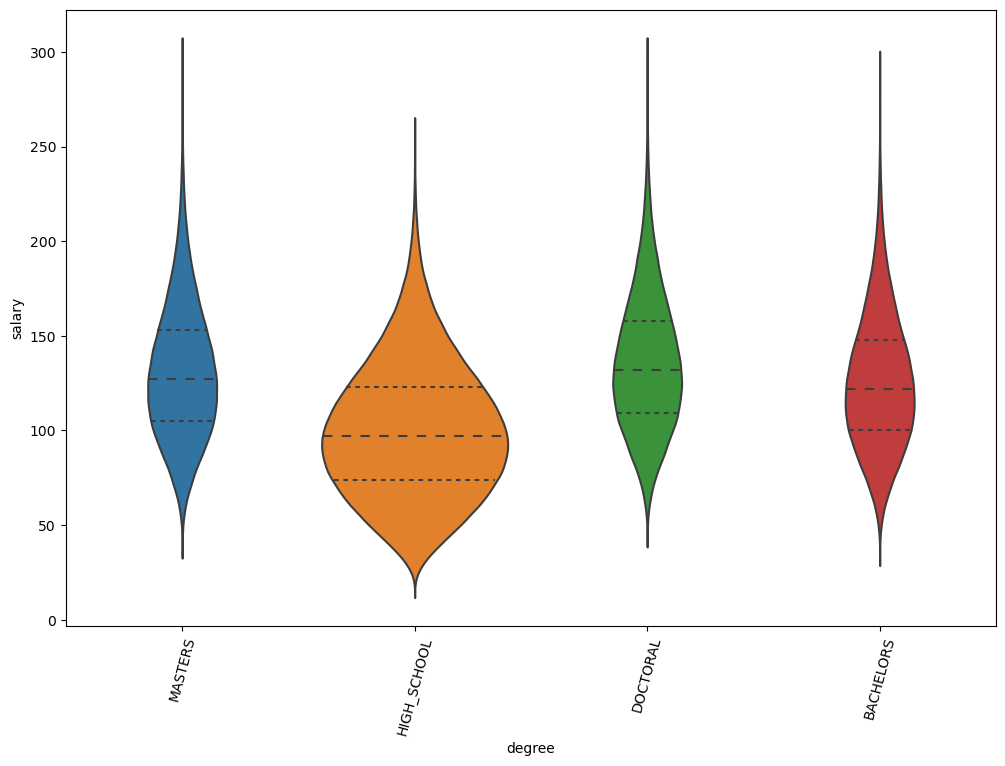

In [29]:
ViolinPlot(data_salary,'degree')

Having a college degree seems to give a higher salary than high school or no degree.
Distributions appear normal.


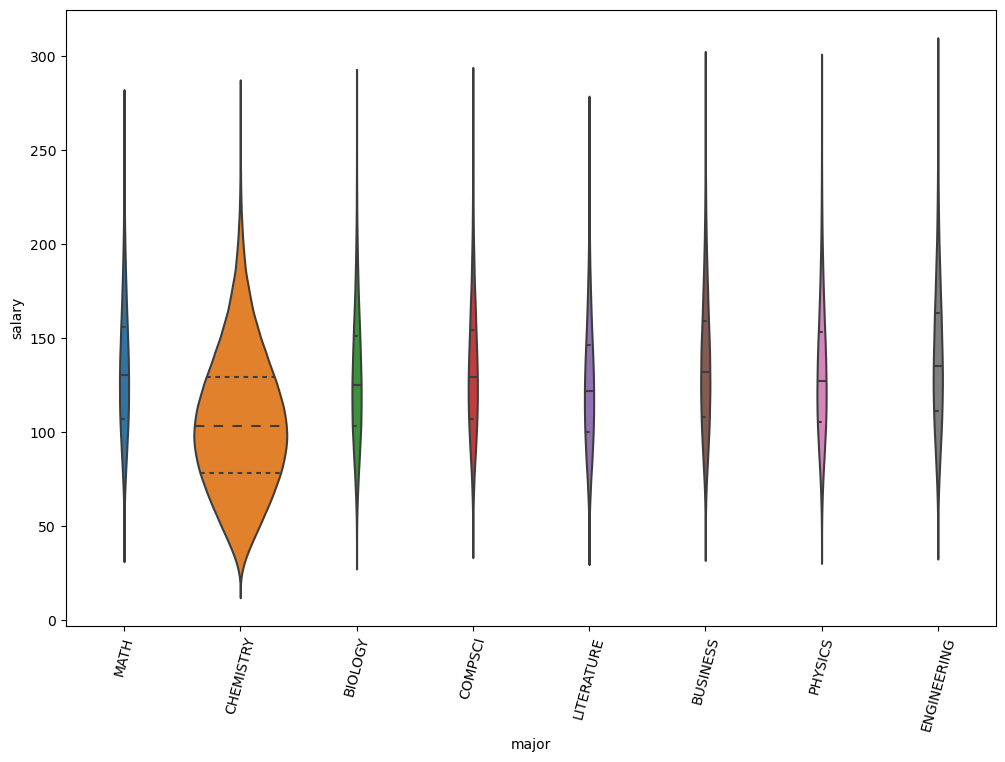

In [30]:
# major violin plot
ViolinPlot(data_salary,'major')

Having no major seems to have lower salaries than having a major. No major may correspond to a high school degree only or no degree at all. <br>
Distributions appear normal.


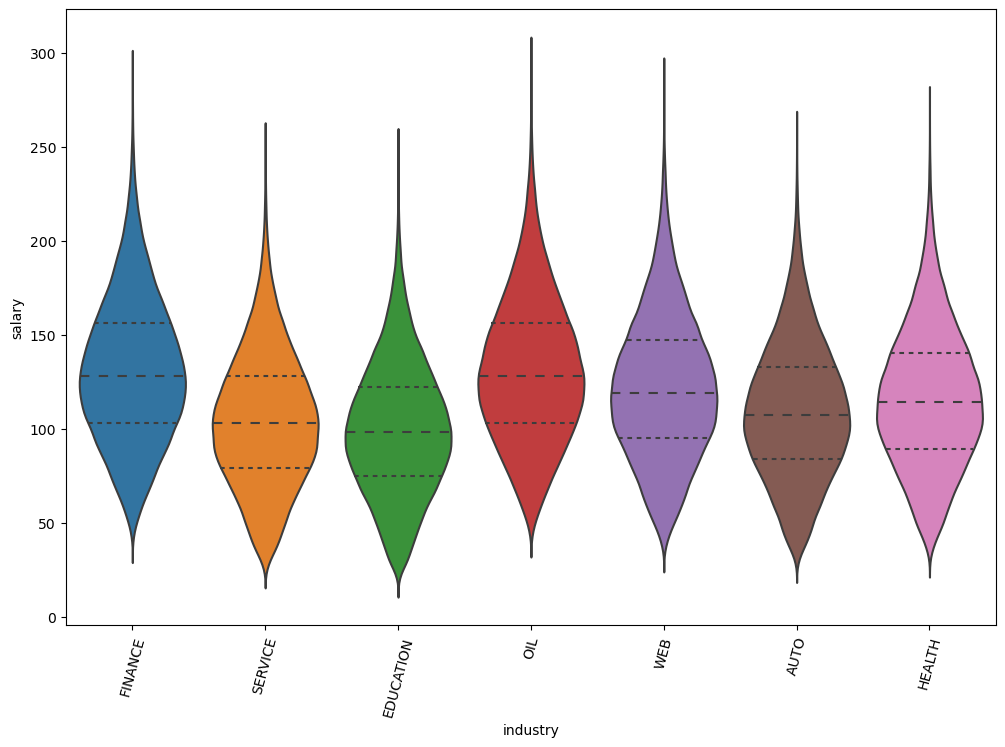

In [31]:
ViolinPlot(data_salary,'industry')

The oil industry, followed by finance and web, seem to have highest salaries. <br>
The education and service industries seem to have the lowest salaries.<br>
Distributions appear normal.
<br>
<br>

jobType Column



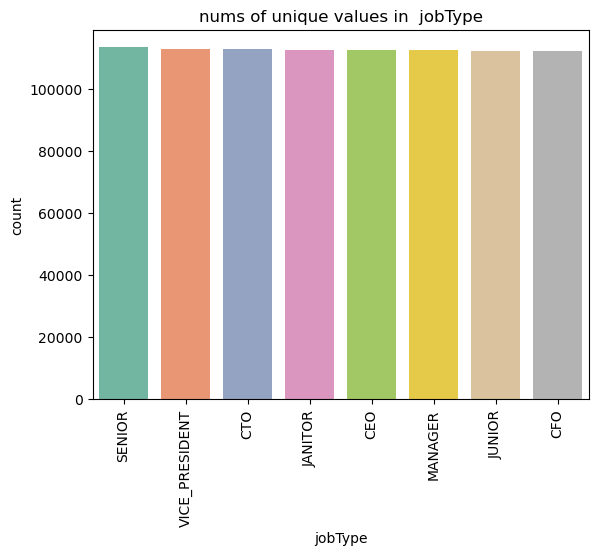

****OBSERVATION****
We have 8 unique values in jobType
The highest is  SENIOR and the lowest is CFO 
**************************************************
degree Column



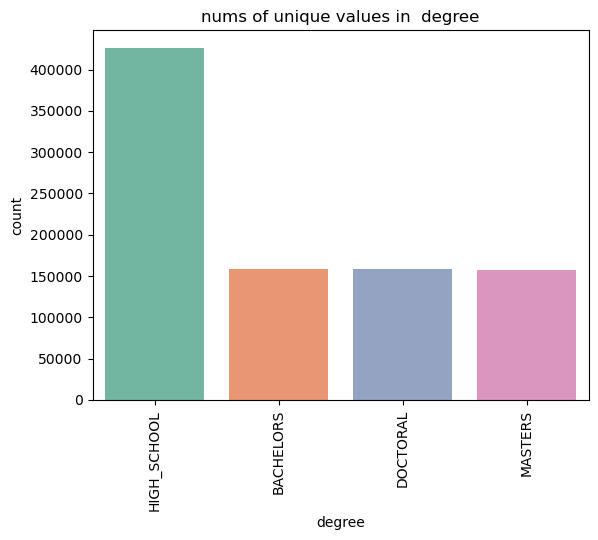

****OBSERVATION****
We have 4 unique values in degree
The highest is  HIGH_SCHOOL and the lowest is MASTERS 
**************************************************
major Column



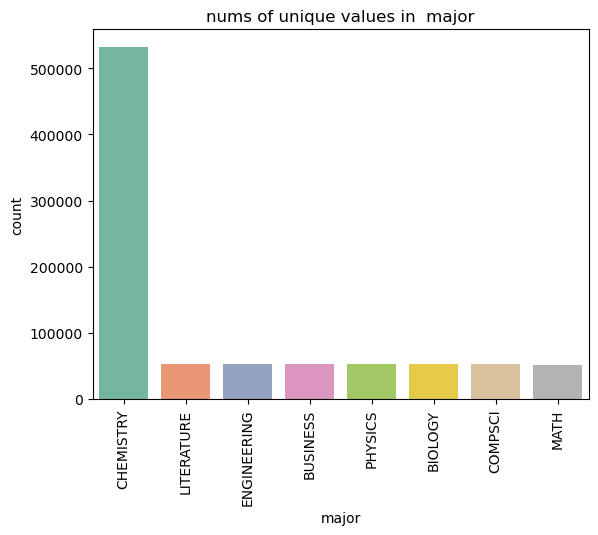

****OBSERVATION****
We have 8 unique values in major
The highest is  CHEMISTRY and the lowest is MATH 
**************************************************
industry Column



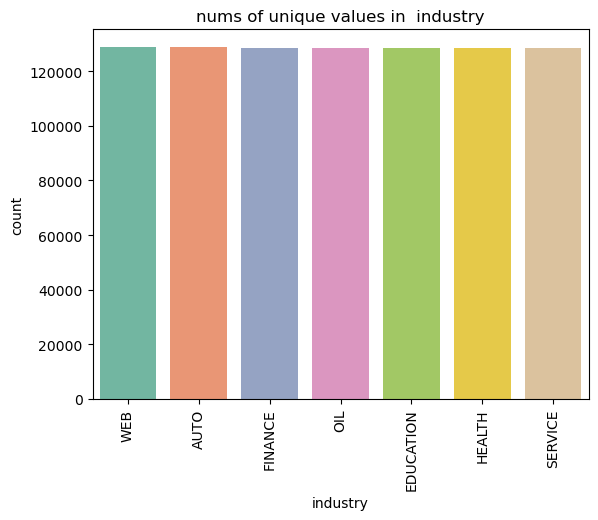

****OBSERVATION****
We have 7 unique values in industry
The highest is  WEB and the lowest is SERVICE 
**************************************************


In [32]:
data_object=data_salary.select_dtypes("object")
def object_col_with_chart(data):
    for col in data.columns:
        plt.Figure(figsize=(10,8))
        print(f"{col} Column")
        print(""*50)

        # print(data[col].value_counts().sort_values(ascending=False))
        sns.countplot(x=data[col],palette = "Set2",order=data[col].value_counts().sort_values(ascending=False).index)
        plt.xticks(rotation=90)
        plt.title(f"nums of unique values in  {col}")
        plt.show()
        print(f"****OBSERVATION****")
        print(f"We have {data[col].nunique()} unique values in {col}")
        print(f"The highest is  {data[col].value_counts().index[0]} and the lowest is {data[col].value_counts().index[-1]} ")
        print("*"*50)

object_col_with_chart(data_object)


## correlation

to see correlation according to `categorical` let's take correlation by take the avg salary according each feature 

In [37]:
train_data_copy = data_salary.copy()


In [42]:
data_object=data_salary.select_dtypes("object")

In [43]:
#Convert and replace category values into each categories' average salaries for each categorical variable
for i in data_object: 
    train_data_copy[i] = data_salary.groupby(by=i)['salary'].transform('mean')

In [44]:
train_data_copy.head()


,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,115.387139,130.536330,133.182938,130.712520,24,36,158
1,70.788236,100.035820,105.210138,130.712520,3,4,73
2,115.387139,100.035820,105.210138,104.431249,11,23,103
3,70.788236,100.035820,105.210138,99.443554,22,42,63
4,145.292327,135.481979,105.210138,130.966259,15,66,129


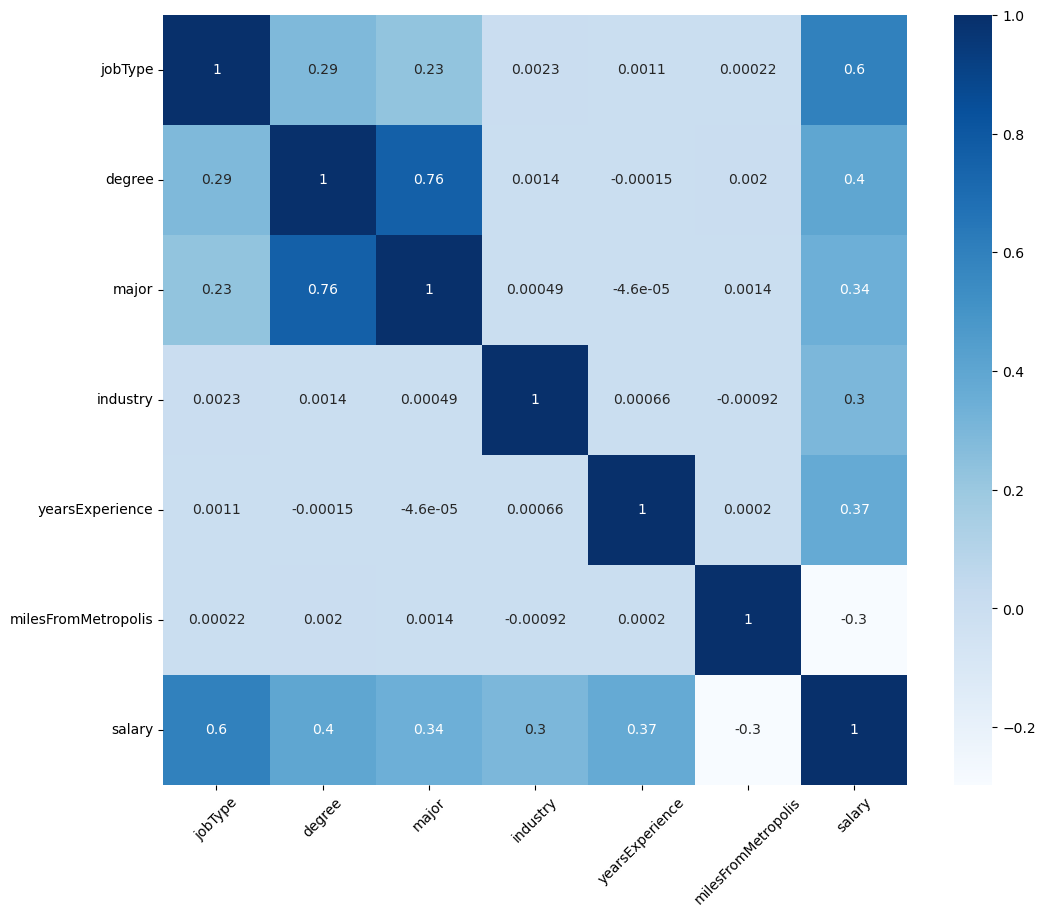

In [45]:
#Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_data_copy.corr(),cmap='Blues',annot=True)
plt.xticks(rotation=45)
plt.savefig('corr_heatmap.png')
plt.show()

**Findings**:

Variable correlations with salary:
Job position (jobType) is the variable that positively correlates most to salary, followed by degree (degree), years of experience (yearsExperience) and major (major).
There is also slight positive correlations between the job industry (industry) and salary.
Only key negative correlation of salary is the miles from metropolis (milesFromMetropolis).
Correlations between feature variables:
There is a significant positive correlation between major and degree (0.85).
Job positions are slightly positively correlated to both major and degree.
No other collinearity is shown across the feature variables - they are all close to zero.

# Modeling

In [46]:
data_salary.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,JANITOR,HIGH_SCHOOL,CHEMISTRY,FINANCE,3,4,73
2,MANAGER,HIGH_SCHOOL,CHEMISTRY,SERVICE,11,23,103
3,JANITOR,HIGH_SCHOOL,CHEMISTRY,EDUCATION,22,42,63
4,CEO,DOCTORAL,CHEMISTRY,OIL,15,66,129


In [47]:
df=data_salary.copy()
df

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,MANAGER,MASTERS,MATH,FINANCE,24,36,158
1,JANITOR,HIGH_SCHOOL,CHEMISTRY,FINANCE,3,4,73
2,MANAGER,HIGH_SCHOOL,CHEMISTRY,SERVICE,11,23,103
3,JANITOR,HIGH_SCHOOL,CHEMISTRY,EDUCATION,22,42,63
4,CEO,DOCTORAL,CHEMISTRY,OIL,15,66,129
...,...,...,...,...,...,...,...
899990,CEO,BACHELORS,COMPSCI,AUTO,21,40,127
899991,CTO,BACHELORS,CHEMISTRY,WEB,20,24,129
899992,SENIOR,HIGH_SCHOOL,CHEMISTRY,AUTO,21,48,127
899993,JANITOR,HIGH_SCHOOL,CHEMISTRY,HEALTH,5,78,46


In [48]:
data_numerical=df[["yearsExperience","milesFromMetropolis","salary"]]
data_numerical

,yearsExperience,milesFromMetropolis,salary
0,24,36,158
1,3,4,73
2,11,23,103
3,22,42,63
4,15,66,129
...,...,...,...
899990,21,40,127
899991,20,24,129
899992,21,48,127
899993,5,78,46


## scaling the data using minmax scaler

In [49]:
#Normalise numeric features to reduce bais based on measurement and range
numeric_df = data_numerical[["yearsExperience","milesFromMetropolis"]]
numeric_df = MinMaxScaler().fit_transform(numeric_df)
data_numerical[["yearsExperience","milesFromMetropolis"]] = numeric_df

/tmp/ipykernel_1611/2621521982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerical[["yearsExperience","milesFromMetropolis"]] = numeric_df


In [50]:
numeric_df

array([[1.        , 0.36363636],
       [0.125     , 0.04040404],
       [0.45833333, 0.23232323],
       ...,
       [0.875     , 0.48484848],
       [0.20833333, 0.78787879],
       [0.91666667, 0.64646465]])

In [51]:
data_numerical_converted=pd.DataFrame(numeric_df,columns=["yearsExperience","milesFromMetropolis"])

In [52]:
data_numerical_converted

,yearsExperience,milesFromMetropolis
0,1.000000,0.363636
1,0.125000,0.040404
2,0.458333,0.232323
3,0.916667,0.424242
4,0.625000,0.666667
...,...,...
899990,0.875000,0.404040
899991,0.833333,0.242424
899992,0.875000,0.484848
899993,0.208333,0.787879


In [53]:
data_numerical_converted["salary"]=data_numerical["salary"]
data_numerical_converted

,yearsExperience,milesFromMetropolis,salary
0,1.000000,0.363636,158
1,0.125000,0.040404,73
2,0.458333,0.232323,103
3,0.916667,0.424242,63
4,0.625000,0.666667,129
...,...,...,...
899990,0.875000,0.404040,127
899991,0.833333,0.242424,129
899992,0.875000,0.484848,127
899993,0.208333,0.787879,46


## Encoded the Categorical 
data using onehot encoder because is best one when we have many uniques items in the feature 

In [54]:
one_hot_category= OneHotEncoder()
one_hot_category_result = one_hot_category.fit_transform(df[["jobType","degree","major","industry"]])
# np.array(feature_labels).ravel()
encoded_data=pd.DataFrame(one_hot_category_result.toarray(), columns=np.array(one_hot_category.get_feature_names_out().ravel()))
# len(one_hot_category_result.toarray()[0])
encoded_data

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
899991,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
899992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
899993,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## concat the numerical data and encoded data

In [55]:
all_data = pd.concat([data_numerical_converted, encoded_data], axis=1)
all_data

,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,...,major_LITERATURE,major_MATH,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,1.000000,0.363636,158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.125000,0.040404,73,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.458333,0.232323,103,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.916667,0.424242,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.625000,0.666667,129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899990,0.875000,0.404040,127,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
899991,0.833333,0.242424,129,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
899992,0.875000,0.484848,127,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
899993,0.208333,0.787879,46,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## identify featuers X and target variable y

In [56]:

X = all_data.drop(['salary'],axis=1) # inputs
y = all_data['salary'] #output

In [57]:
print("X.shape",X.shape)
print("y.shape",y.shape)


X.shape (899995, 29)
y.shape (899995,)


## split the data into train test 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [59]:
X_train.shape

(629996, 29)

## identify the Models we try 

In [60]:
#Vanilla Linear Regressions 
lr = LinearRegression()
Lasso = Lasso()
Ridge = Ridge()

#Vanilla Regression Trees
dtr = DecisionTreeRegressor()
gbm = GradientBoostingRegressor()
rfr = RandomForestRegressor(n_estimators=10)
#multi perpetron
mlp=MLPRegressor()
#xgboost
xgb= xgboost.XGBRegressor()

# List of all the pipelines
pipelines = [lr,Lasso,Ridge, dtr, gbm,rfr,mlp,xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1:"Lasso",2: "Ridge", 3: "DecisionTree",4:"GradientBoostingRegressor",5:"RandomForestRegressor",6:"MLP", 7:"xgb"}



## try to find the lowest MSE

In [61]:
MSE = []
model_name=[]
for i, model in enumerate(pipelines):
    neg_mse = cross_val_score(model, X_train,y_train,scoring="neg_mean_squared_error", cv=2,n_jobs=2)
    mean_mse= -1.0*np.mean(neg_mse)
    MSE.append(mean_mse)
    model_name.append(pipe_dict[i])
    print("%s:\tMSE=%.3f" % (pipe_dict[i],mean_mse))
  

LinearRegression:	MSE=387.446
Lasso:	MSE=518.437
Ridge:	MSE=387.446
DecisionTree:	MSE=717.361
GradientBoostingRegressor:	MSE=376.965
RandomForestRegressor:	MSE=470.212
MLP:	MSE=359.754
xgb:	MSE=364.837


In [62]:
result_=pd.DataFrame({'Model':model_name, 'MSE':MSE})
result_=result_.sort_values(by='MSE',ascending=True).reset_index(drop=True)

min_MSE=min(result_['MSE'])
best_model=result_['Model'][0]# first row and first column

print('The minimum MSE is {} and the best model is {}'.format(min_MSE,best_model))

The minimum MSE is 359.7536126247577 and the best model is MLP


In [63]:
result_.set_index("Model", inplace = True)


In [69]:
result_

,MSE
Model,
MLP,359.753613
xgb,364.837231
GradientBoostingRegressor,376.964803
Ridge,387.446193
LinearRegression,387.446327
RandomForestRegressor,470.212424
Lasso,518.437256
DecisionTree,717.360528


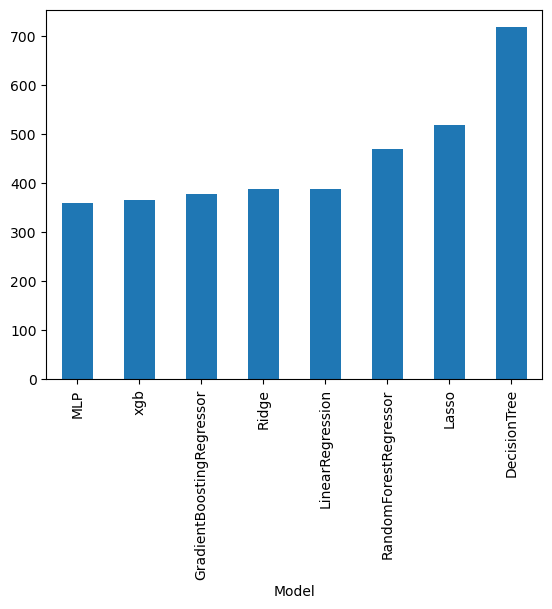

In [64]:
result_["MSE"].plot(kind="bar")
plt.xticks(rotation=90);

## Grid search on mlpregressor

In [65]:
# Search for best parameters for mlp
parameters = {
    'hidden_layer_sizes': [100,200,300],
    'activation': ['relu'],
    'learning_rate': ['adaptive']
}

def param_search(param_grid, n_jobs):
    estimator = MLPRegressor()
    GridCV= GridSearchCV(estimator=estimator, cv=2, param_grid=param_grid, n_jobs=n_jobs) 
    GridCV.fit(X_train, y_train) 

    return GridCV.best_params_ 

param_search(parameters,-1)


{'activation': 'relu', 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive'}

In [66]:
best_Model=MLPRegressor(hidden_layer_sizes=100,activation="relu",learning_rate="adaptive")
best_Model.fit(X_train,y_train)
y_pred=best_Model.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
joblib.dump(best_Model,"best_Model_MLP.pkl")

MSE:  359.04126550309644


['best_Model_MLP.pkl']

# TEST SECTION

In [ ]:
import pandas as pd
import joblib
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

def predict_salary(path_of_data):
    loaded_model = joblib.load("best_Model_MLP.pkl")
    df=pd.read_csv(path_of_data)
    df=df.drop(["companyId","jobId"],axis=1)
    data_numerical=df[["yearsExperience","milesFromMetropolis"]]
    numeric_df = MinMaxScaler().fit_transform(data_numerical)
    data_numerical[["yearsExperience","milesFromMetropolis"]] = numeric_df
    imputer = SimpleImputer(missing_values="NONE", strategy="most_frequent")
    imputer = imputer.fit(df.loc[:, 'degree':'major'])
    df.loc[:, 'degree':'major'] = imputer.transform(df.loc[:, 'degree':'major'])
    one_hot_category= OneHotEncoder()
    one_hot_category_result = one_hot_category.fit_transform(df[["jobType","degree","major","industry"]])
    encoded_data=pd.DataFrame(one_hot_category_result.toarray(), columns=np.array(one_hot_category.get_feature_names_out().ravel()))
    all_data = pd.concat([data_numerical, encoded_data], axis=1)
    predictions = loaded_model.predict(all_data)
    all_data["salary_predicted"]=predictions.tolist()
    return all_data
predict_salary(".csv")